<h1 style="text-align:center">CONVOLUTIONAL NEURAL NETWORK</h1>

NAMA : GAYUH FIKRI KHUSNAELI

NIM : 21110024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Files
data="/content/drive/MyDrive/COLLEGE/SEMESTER 5/DEEP LEARNING/data/chest_xray"
pd.DataFrame(os.listdir(data),columns=['Files'])

,Files
0,train
1,val
2,chest_xray
3,test
4,__MACOSX


In [ ]:
#Melihat jumlah data
dict_={'train':[],'test':[],'val':[]}
for i in tqdm(['train','test','val']):
    data_=os.path.join(data,i)
    for j in os.listdir(data_):
        dict_[i].append(len(os.listdir(os.path.join(data_,j))))

pd.DataFrame(dict_,index=os.listdir(data_))

100%|██████████| 3/3 [00:00<00:00,  3.22it/s]


,train,test,val
NORMAL,1341,392,8
PNEUMONIA,3875,234,8


In [ ]:
#Mengumpulkan ukuran dari data gambar tersebut
def Size(folder):
    size=[]
    data_=os.path.join(data,folder)
    for i in tqdm(os.listdir(data_)):
        data2=os.path.join(data_,i)
        for j in os.listdir(data2):
            img=cv2.imread(os.path.join(data2,j))
            size.append(img.shape)
    return pd.Series(size)

In [ ]:
# data train
Size('train')

100%|██████████| 2/2 [01:42<00:00, 51.44s/it]


0       (1044, 1248, 3)
1       (2534, 2890, 3)
2       (1545, 1642, 3)
3        (970, 1410, 3)
4       (2067, 2844, 3)
             ...       
5211     (856, 1320, 3)
5212    (1312, 1624, 3)
5213     (568, 1000, 3)
5214     (976, 1496, 3)
5215      (632, 976, 3)
Length: 5216, dtype: object

In [ ]:
# data test
Size('test')

100%|██████████| 2/2 [00:12<00:00,  6.27s/it]


0        (480, 856, 3)
1       (801, 1164, 3)
2       (704, 1000, 3)
3       (792, 1184, 3)
4        (520, 984, 3)
            ...       
621     (906, 1434, 3)
622    (1485, 2198, 3)
623    (1600, 2148, 3)
624    (1554, 1936, 3)
625    (1033, 1550, 3)
Length: 626, dtype: object

In [ ]:
#data validation
Size('val')

100%|██████████| 2/2 [00:00<00:00,  7.52it/s]


0     (1416, 1776, 3)
1      (928, 1288, 3)
2     (1040, 1272, 3)
3     (1302, 1564, 3)
4     (1104, 1328, 3)
5     (1104, 1240, 3)
6     (1225, 1632, 3)
7     (1416, 1736, 3)
8      (664, 1152, 3)
9     (1128, 1664, 3)
10     (952, 1192, 3)
11     (944, 1416, 3)
12     (864, 1256, 3)
13     (712, 1072, 3)
14      (592, 968, 3)
15     (656, 1016, 3)
dtype: object

In [ ]:
Size=80
images=[]
labels=[]
def load():
    global images
    global labels
    for folder in tqdm(['train','test','val']):
        data_=os.path.join(data,folder)
        for files in os.listdir(data_):
            data2=os.path.join(data_,files)
            for img in os.listdir(data2):
                image=cv2.imread(os.path.join(data2,img))
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,(Size,Size))
                image=image/255.0
                images.append(image)
                labels.append(files)
load()
images=np.array(images)
labels=np.array(labels)

100%|██████████| 3/3 [01:44<00:00, 34.69s/it]


In [ ]:
print('Ukuran Foto :',images.shape)
print('Ukuran Label :',labels.shape)

Ukuran Foto : (5858, 80, 80, 3)
Ukuran Label : (5858,)


In [ ]:
labels[0]

'NORMAL'

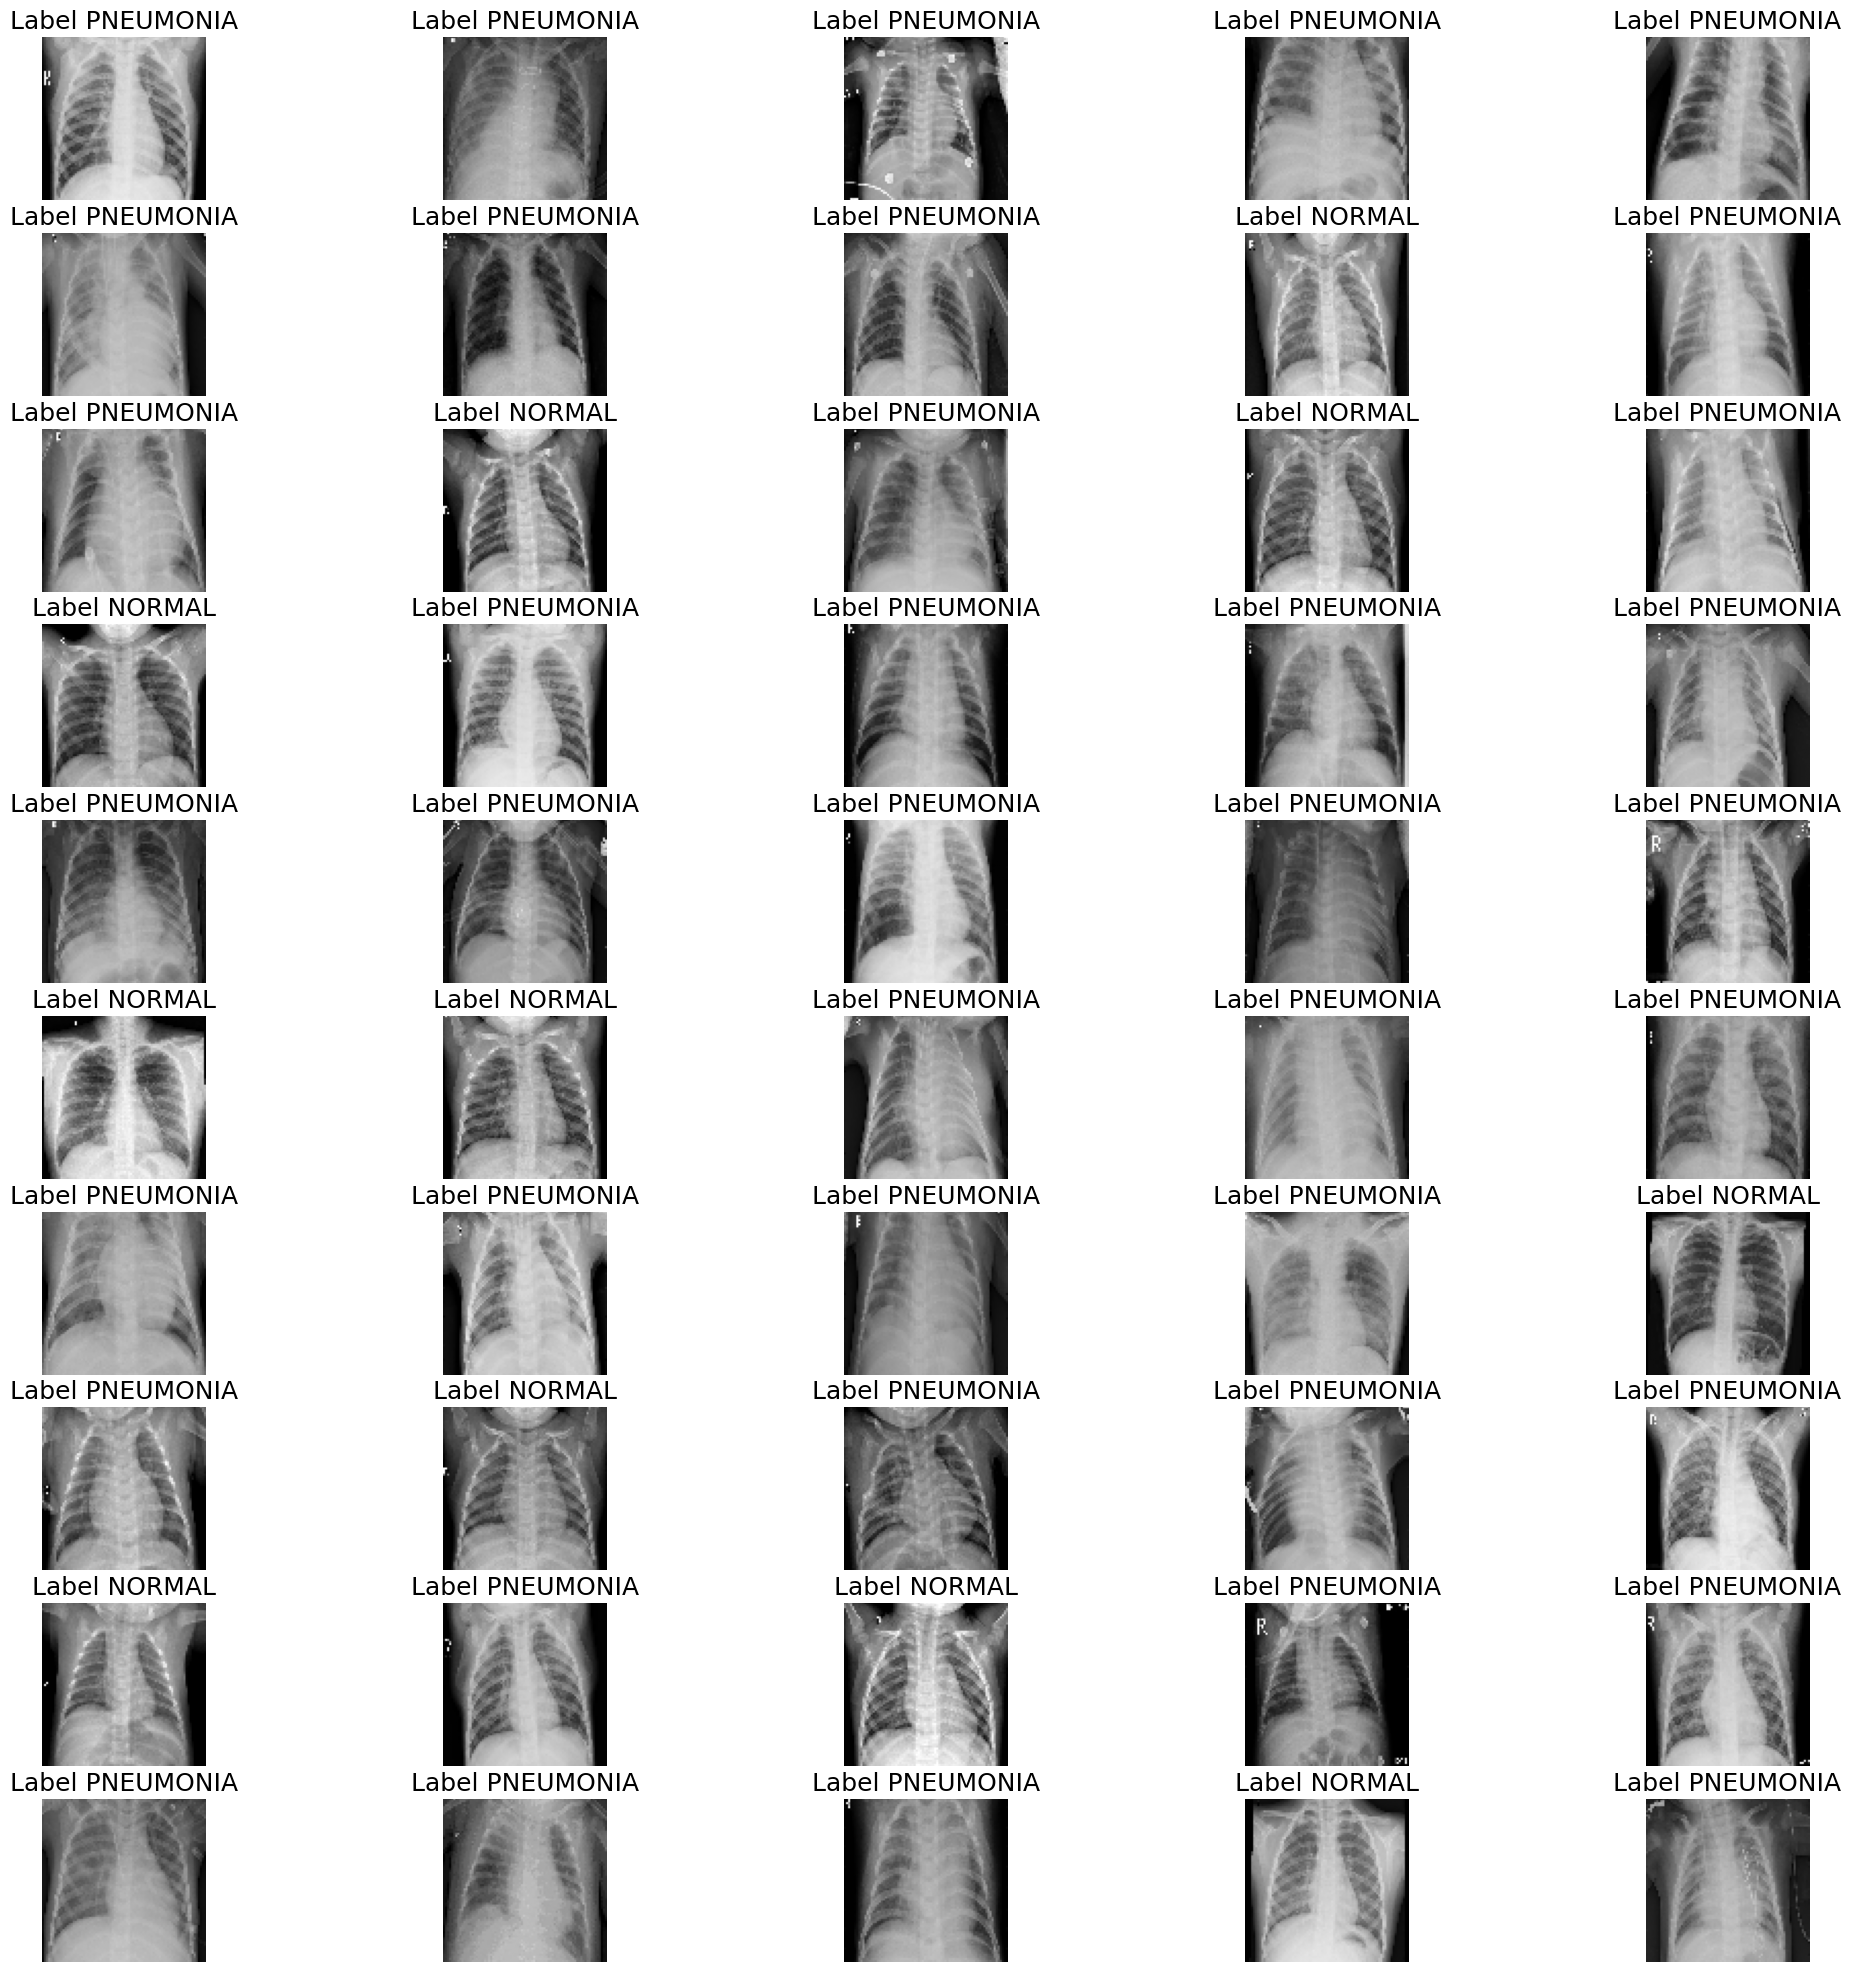

In [ ]:
#Menampilkan gambar & label
plt.figure(figsize=(25,25))
x = 1
for i in np.random.randint(0,len(images),50):
    plt.subplot(10, 5, x)
    plt.imshow(images[i])
    plt.title(f'Label {labels[i]}', fontsize=18)
    plt.axis('off')
    x += 1

In [ ]:
label=LabelEncoder()
labels=label.fit_transform(labels)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
x_train, x_test2, y_train, y_test2 = train_test_split(images, labels, test_size=0.30, random_state=44, shuffle =True)
x_val, x_test, y_val, y_test = train_test_split(x_test2, y_test2, test_size=0.5, random_state=44, shuffle =True)
print('X_train shape: ' , x_train.shape)
print('X_val shape: ' , x_val.shape)
print('X_test shape: ' , x_test.shape)
print('y_train shape: ' , y_train.shape)
print('y_val shape: ' , y_val.shape)
print('y_test shape: ' , y_test.shape)

X_train shape:  (4100, 80, 80, 3)
X_val shape:  (879, 80, 80, 3)
X_test shape:  (879, 80, 80, 3)
y_train shape:  (4100,)
y_val shape:  (879,)
y_test shape:  (879,)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.regularizers import l2

# Membuat model dasar InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(80, 80, 3))

# Menambahkan layer baru
x = base_model.output
x = Flatten()(x)
x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)

predictions = Dense(1, activation='sigmoid')(x)

# Membuat model akhir
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer ='adam', loss='mse', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 80, 80, 3)]          0         []                            
                                                                                                  
 conv2d_97 (Conv2D)          (None, 39, 39, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_97 (Ba  (None, 39, 39, 32)           96        ['conv2d_97[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 39, 39, 32)           0         ['batch_normalization_97

In [ ]:
history = model.fit(x_train,y_train,epochs=55,validation_data=(x_val,y_val))

Epoch 1/55
129/129 [==============================] - 13s 98ms/step - loss: 0.0329 - accuracy: 0.9712 - val_loss: 0.0566 - val_accuracy: 0.9408
Epoch 2/55
129/129 [==============================] - 8s 64ms/step - loss: 0.0237 - accuracy: 0.9805 - val_loss: 0.0948 - val_accuracy: 0.8999
Epoch 3/55
129/129 [==============================] - 9s 73ms/step - loss: 0.0214 - accuracy: 0.9822 - val_loss: 0.0465 - val_accuracy: 0.9522
Epoch 4/55
129/129 [==============================] - 9s 70ms/step - loss: 0.0260 - accuracy: 0.9793 - val_loss: 0.0543 - val_accuracy: 0.9465
Epoch 5/55
129/129 [==============================] - 9s 67ms/step - loss: 0.0372 - accuracy: 0.9671 - val_loss: 0.0704 - val_accuracy: 0.9306
Epoch 6/55
129/129 [==============================] - 9s 72ms/step - loss: 0.0449 - accuracy: 0.9571 - val_loss: 0.0653 - val_accuracy: 0.9306
Epoch 7/55
129/129 [==============================] - 8s 63ms/step - loss: 0.0644 - accuracy: 0.9376 - val_loss: 0.1463 - val_accuracy: 0.847

In [ ]:
score, acc = model.evaluate(x_test,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

28/28 [==============================] - 1s 21ms/step - loss: 0.0376 - accuracy: 0.9602
Test Loss = 0.03756370767951012
Test Accuracy = 0.9601820111274719


In [ ]:
history = pd.DataFrame(history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.032908,0.971220,0.056555,0.940842
1,0.023662,0.980488,0.094839,0.899886
2,0.021397,0.982195,0.046512,0.952218
3,0.025999,0.979268,0.054331,0.946530
4,0.037231,0.967073,0.070440,0.930603
5,0.044941,0.957073,0.065342,0.930603
6,0.064386,0.937561,0.146331,0.847554
7,0.042265,0.961707,0.045944,0.955631
8,0.029250,0.974146,0.037007,0.962457
9,0.030851,0.969268,0.050238,0.953356


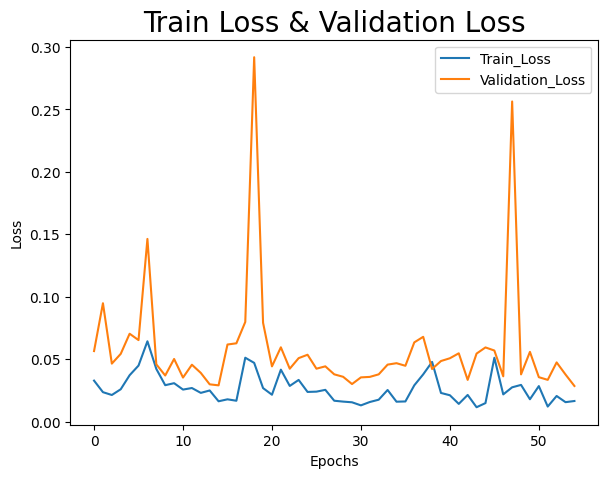

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history['loss'],label='Train_Loss')
plt.plot(history['val_loss'],label='Validation_Loss')
plt.title('Train Loss & Validation Loss',fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
prediction = model.predict(x_test)
prediction[0]

28/28 [==============================] - 4s 28ms/step


array([0.99568766], dtype=float32)

In [ ]:
y_pred=np.where(prediction>=.5,1,0)
df=pd.DataFrame()
df['Actual'],df['Prediction']=label.inverse_transform(y_test),label.inverse_transform(y_pred)
df

,Actual,Prediction
0,PNEUMONIA,PNEUMONIA
1,PNEUMONIA,PNEUMONIA
2,PNEUMONIA,PNEUMONIA
3,PNEUMONIA,PNEUMONIA
4,PNEUMONIA,PNEUMONIA
...,...,...
874,PNEUMONIA,PNEUMONIA
875,PNEUMONIA,PNEUMONIA
876,PNEUMONIA,PNEUMONIA
877,PNEUMONIA,PNEUMONIA


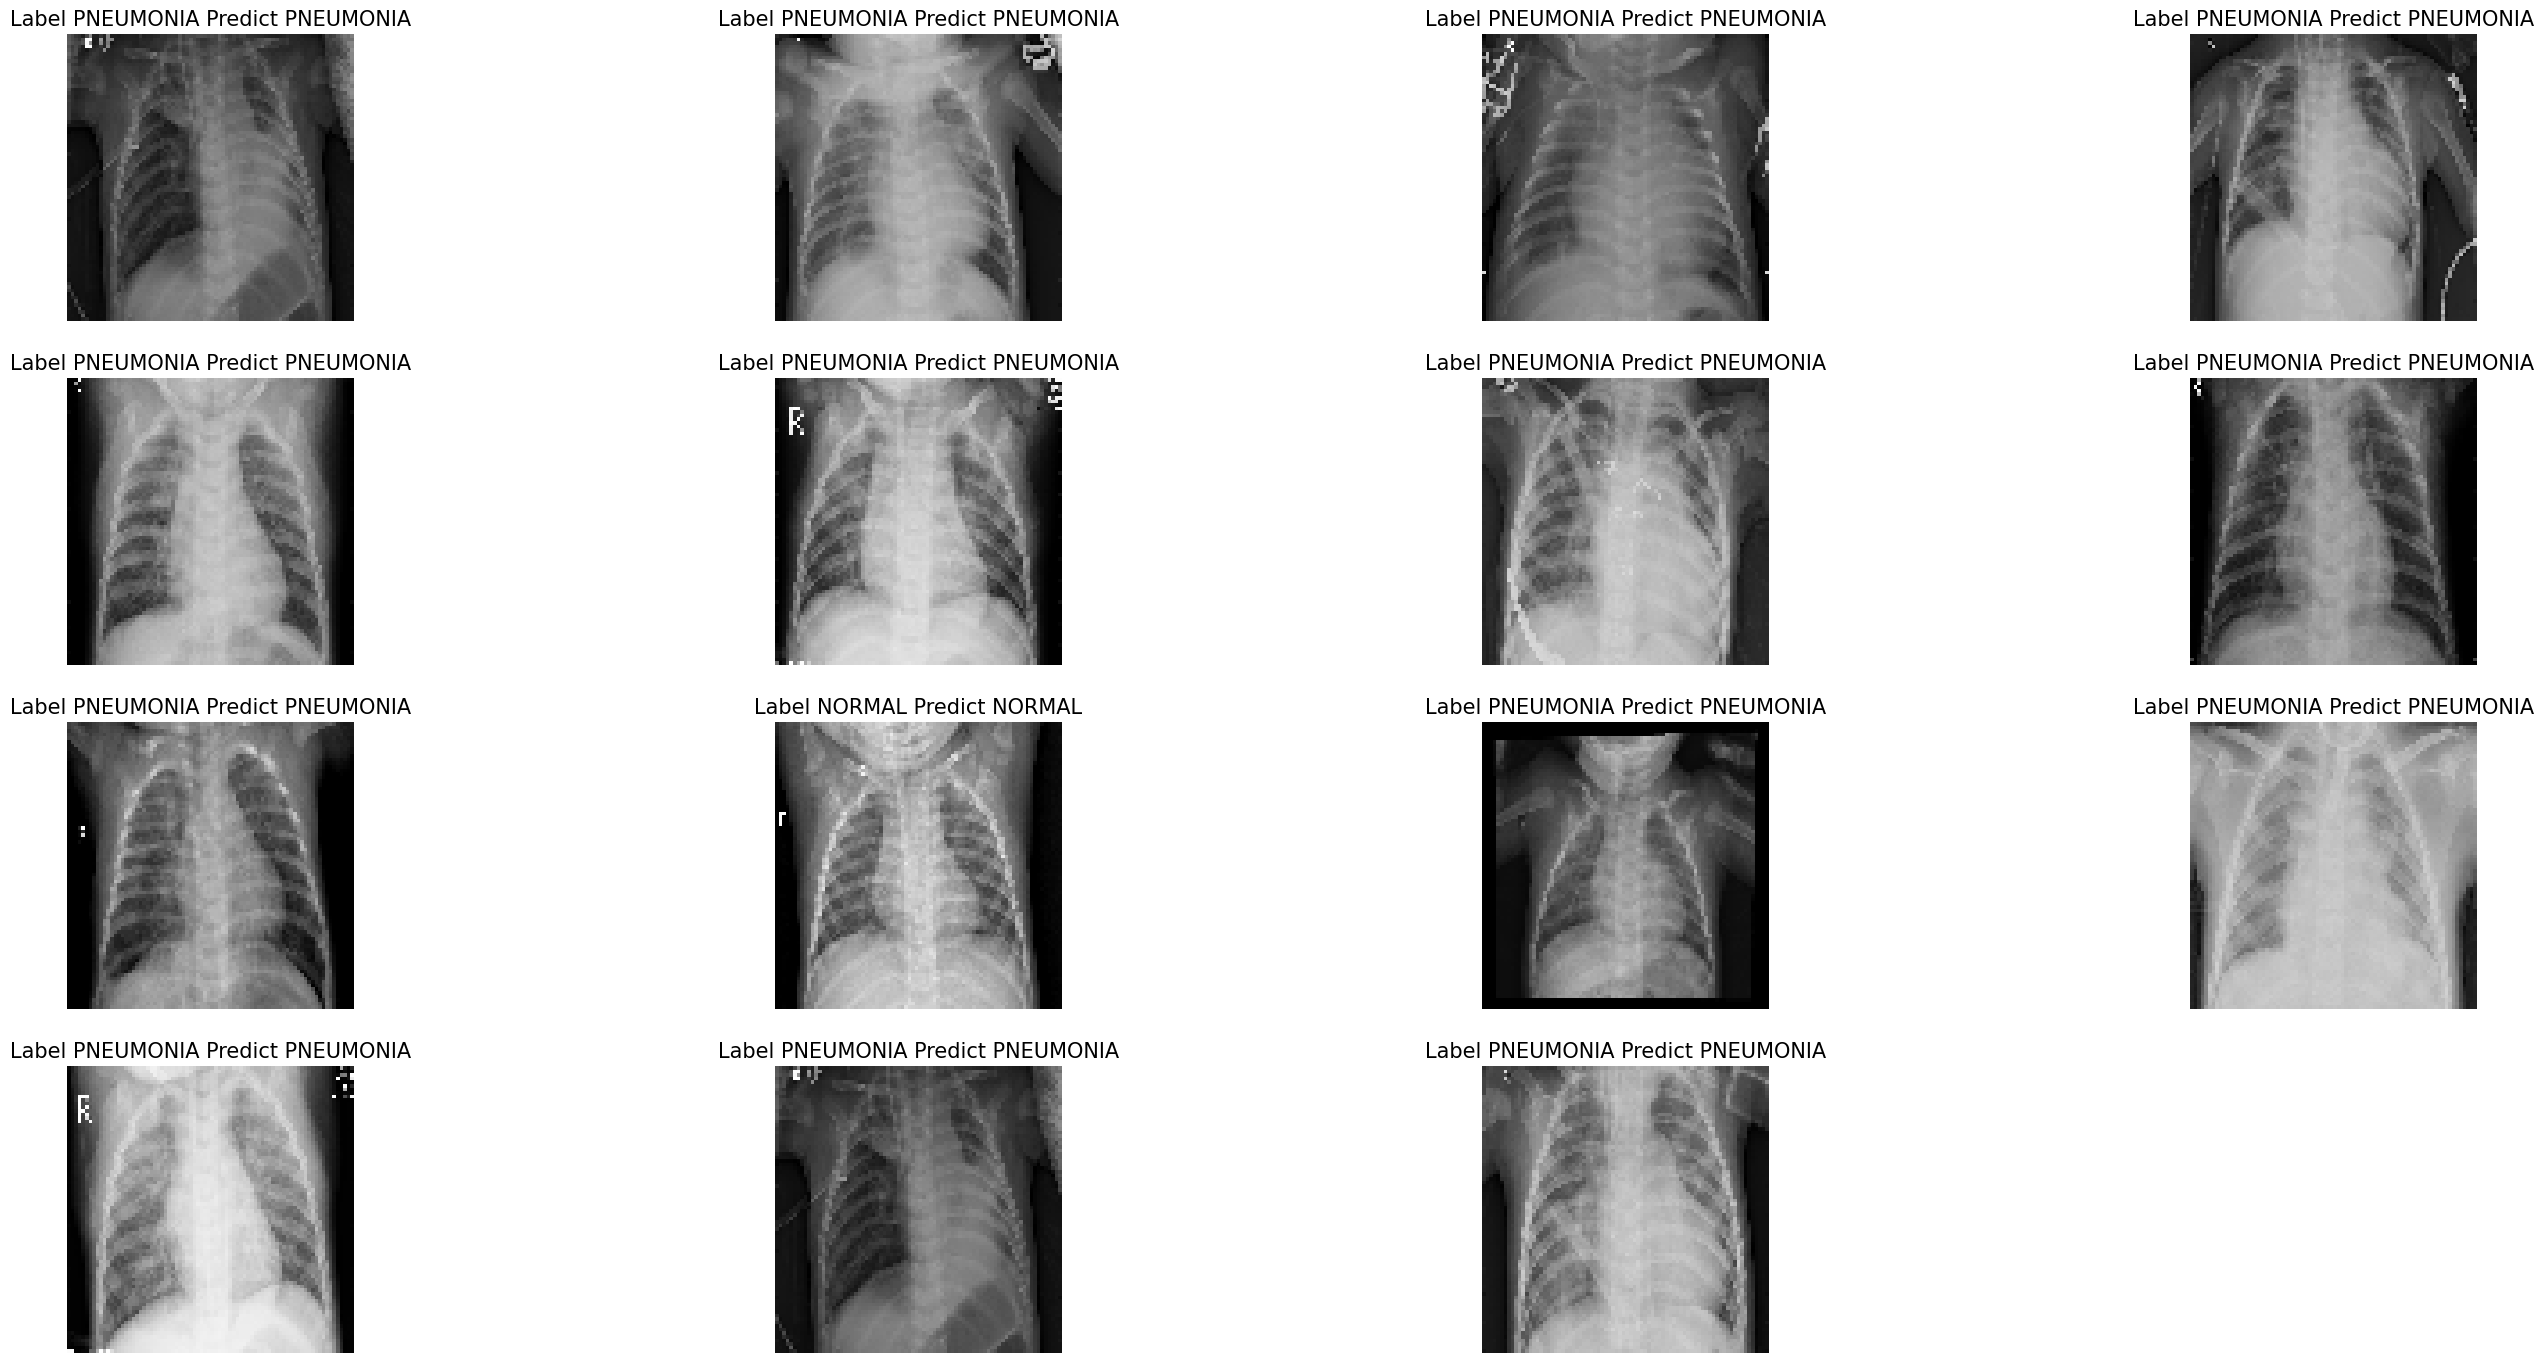

In [ ]:
y_test2=label.inverse_transform(y_test)
y_pred2=label.inverse_transform(y_pred)
plt.figure(figsize=(35,35))
x = 1
for i in np.random.randint(0,len(x_test),15):
    plt.subplot(8, 4, x)
    plt.imshow(x_test[i])
    plt.title(f'Label {y_test2[i]} Predict {y_pred2[i]}', fontsize=15)
    plt.axis('off')
    x += 1

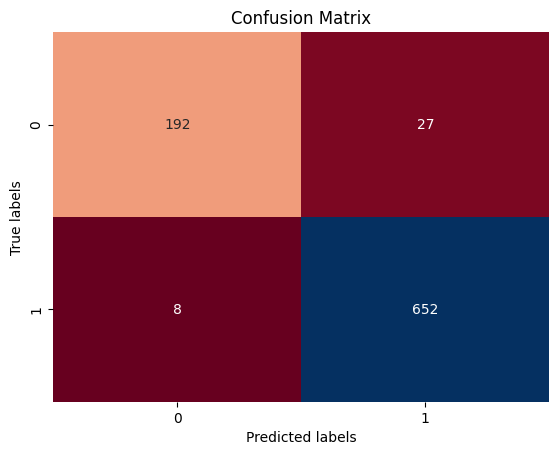

array([[192,  27],
       [  8, 652]])

In [ ]:
ax= plt.subplot()
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

In [ ]:
ClassificationReport = classification_report(y_test,y_pred)
print('Hasil Klasifikasi: \n', ClassificationReport )

Hasil Klasifikasi: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       219
           1       0.96      0.99      0.97       660

    accuracy                           0.96       879
   macro avg       0.96      0.93      0.95       879
weighted avg       0.96      0.96      0.96       879

